# Setup

In [1]:
from datetime import timedelta
import json, heapq, itertools, csv
import time
import datetime
from datetime import datetime, timezone
import os
import tqdm
import pickle
import numpy as np
import pandas as pd
import random
import networkx as nx
from matplotlib import pyplot as plt
import seaborn as sns
import re, string
from collections import OrderedDict
# !pip install langdetect
# from langdetect import detect_langs
# langdetect.DetectorFactory.seed = 0

from pathlib import Path
from google.colab import drive
# drive.mount('/content/drive')

# %%
# ──────────────────────────────────────────────────────────────────────────────
# 1. Drive Mount & Paths
# ──────────────────────────────────────────────────────────────────────────────
drive.mount('/content/drive')

# Base project folder (Ignacio standard)
# BASE = Path('/content/drive/My Drive/Colab Projects/AI Public Trust')
BASE = Path('/content/drive/My Drive/AI Public Trust')

twits_folder = BASE / 'Raw Data/Twits/'
test_folder = BASE / 'Raw Data/'
print("Current Directory:", twits_folder)
datasets_folder = BASE / 'Data Sets'
cleanedds_folder = BASE / 'Data Sets' / 'Cleaned Data'
networks_folder = BASE / 'Data Sets' / 'Networks'

Mounted at /content/drive
Current Directory: /content/drive/My Drive/AI Public Trust/Raw Data/Twits


# Sanity Check

## Sanity Check Test

In [2]:
# Check how it looks, LINE BY LINE
# CHECKING FOR TYPES OF TWEET THAT ARE NOT ORIGINAL
AItrust_twits_dict_test = open(cleanedds_folder/'AItrust_twits_dict_test.json','r',encoding='utf-8')

i = 0
for line in AItrust_twits_dict_test:
    twit = json.loads(line)
    #print(twit)
    try:
      i+=1
      print(twit['referenced_tweets'])
      print(twit['type'])
      print(twit.keys())
      print('------')
    except:
      pass
    #print('------')
    if i>5:
        break
AItrust_twits_dict_test.close()

1592178048002326529
retweeted
dict_keys(['id', 'text', 'created_at', 'public_metrics', 'author_id', 'type', 'referenced_tweets', 'conversation_id', 'referenced_tweets_dictionary'])
------
1592187343351463936
replied_to
dict_keys(['id', 'text', 'created_at', 'public_metrics', 'author_id', 'type', 'referenced_tweets', 'conversation_id', 'referenced_tweets_dictionary'])
------
1591860196737175553
replied_to
dict_keys(['id', 'text', 'created_at', 'public_metrics', 'author_id', 'type', 'referenced_tweets', 'conversation_id', 'referenced_tweets_dictionary'])
------


In [3]:
# Check how it looks, LINE BY LINE
# dict_keys(['description', 'public_metrics', 'created_at', 'id', 'entities', 'name', 'username', 'verified'])
AItrust_author_dict_test = open(cleanedds_folder/'AItrust_author_dict_test.json','r',encoding='utf-8')

i = 0
for line in AItrust_author_dict_test:
    i+=1
    author = json.loads(line)
    print(author.keys())
    print(author['verified'])
    if i>10:
        break
AItrust_author_dict_test.close()

dict_keys(['description', 'public_metrics', 'created_at', 'id', 'entities', 'name', 'username', 'verified'])
False
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'entities', 'name', 'username', 'verified'])
False
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'entities', 'name', 'username', 'verified', 'location'])
False
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'name', 'username', 'verified'])
False
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'entities', 'name', 'username', 'verified'])
False
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'entities', 'name', 'username', 'verified', 'location'])
True
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'entities', 'name', 'username', 'verified', 'location'])
False
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'name', 'username', 'verified'])
False
dict_keys(['description', 'public_metrics', 'created_at', 'id', 'enti

## Sanity Test Full

In [4]:
# Check how it looks, LINE BY LINE
# CHECKING FOR TYPES OF TWEET THAT ARE NOT ORIGINAL
AItrust_twits_dict = open(cleanedds_folder/'AItrust_twits_dict.json','r',encoding='utf-8')

i = 0
for line in AItrust_twits_dict:
    twit = json.loads(line)
    #print(twit)
    try:
      i+=1
      print(twit['referenced_tweets'])
      print(twit['type'])
      print(twit.keys())
      print('------')
    except:
      pass
    #print('------')
    if i>5:
        break
AItrust_twits_dict.close()

1622638090752753679
retweeted
dict_keys(['id', 'text', 'created_at', 'public_metrics', 'author_id', 'type', 'referenced_tweets', 'conversation_id', 'referenced_tweets_dictionary'])
------
1622280318861418497
retweeted
dict_keys(['id', 'text', 'created_at', 'public_metrics', 'author_id', 'type', 'referenced_tweets', 'conversation_id', 'referenced_tweets_dictionary'])
------
1622609955411861506
retweeted
dict_keys(['id', 'text', 'created_at', 'public_metrics', 'author_id', 'type', 'referenced_tweets', 'conversation_id', 'referenced_tweets_dictionary'])
------


In [5]:
# Check how it looks, LINE BY LINE
# CHECKING FOR TYPES OF TWEET THAT ARE NOT ORIGINAL
AItrust_author_dict = open(cleanedds_folder/'AItrust_author_dict.json','r',encoding='utf-8')

i = 0
for line in AItrust_author_dict:
    i+=1
    author = json.loads(line)
    print(author.keys())
    print(author['verified'])
    print(author['public_metrics'])
    if i>5:
        break
AItrust_author_dict.close()

dict_keys(['description', 'created_at', 'location', 'id', 'username', 'verified', 'name', 'public_metrics', 'entities'])
False
{'followers_count': 70, 'following_count': 1228, 'tweet_count': 1931, 'listed_count': 0}
dict_keys(['description', 'created_at', 'location', 'id', 'username', 'verified', 'name', 'public_metrics', 'entities'])
False
{'followers_count': 5628, 'following_count': 5856, 'tweet_count': 36333, 'listed_count': 12}
dict_keys(['description', 'created_at', 'location', 'id', 'username', 'verified', 'name', 'public_metrics', 'entities'])
True
{'followers_count': 20700, 'following_count': 397, 'tweet_count': 1511, 'listed_count': 16}
dict_keys(['description', 'created_at', 'location', 'id', 'username', 'verified', 'name', 'public_metrics'])
True
{'followers_count': 26, 'following_count': 123, 'tweet_count': 372, 'listed_count': 2}
dict_keys(['description', 'created_at', 'location', 'id', 'username', 'verified', 'name', 'public_metrics', 'entities'])
True
{'followers_count':

# Prunning by Date and Content

I have noticed that there is a lot of rubbish that we want to avoid analysing, and deserves prunning:
- If a tweet about AI refers (retweets, quotes, replies) a tweet before our cutoff date, it will appear in the dataset.
- If a tweet about AI refers a tweet that contains no AI terminology, it will still appear in our dataset.

So I will remove all tweets with no AI language, and before our cutoff date.

## Prunning Functions

In [6]:
# # --- Core keywords (NO bare AI/AGI here) ------------------------------------
# # We exclude bare "AI"/"AGI" because they're too permissive ("daily", "aging").
# # Instead, we handle them explicitly with _RE_AI_ALLOWED/_RE_AGI_ALLOWED below.
# pattern = re.compile(
#     r'(?:'                                 # group of alternatives
#         r'\bChatGPT\b|'
#         r'\bChat-GPT\b|'
#         r'\bGPT(?:-?3|-?4)?\b|'            # GPT, GPT3, GPT-3, GPT4, GPT-4
#         r'\bLLMs?\b|'                      # LLM, LLMs
#         r'\bBARD\b|'
#         r'\bBERT\b|'
#         r'\bLaMDA\b|'
#         r'\bPaLM\b|'
#         r'\bLLaMA\b|'
#         r'\bMed-PaLM\b|'
#         r'Bing AI|'                        # phrase
#         r'artificial intelligence|'        # phrase
#         r'large language models'           # phrase
#     r')',
#     re.IGNORECASE
# )

# # --- Allowed AI/AGI forms ----------------------------------------------------
# # ✅ Allowed (examples):
# #   AI / #AI / #AIart / @AI_news / AI-powered
# #   AGI / #AGI / #AGI-safety / @AGIteam / AGI-related
# #
# # ❌ Rejected:
# #   "again", "brain", "aging", "engaging" (embedded 'ai'/'agi' inside words)
# _RE_AI_ALLOWED  = re.compile(r'(?:\bAI\b|#AI[\w-]*|@AI[\w-]*|AI-[A-Za-z])',   re.IGNORECASE)
# _RE_AGI_ALLOWED = re.compile(r'(?:\bAGI\b|#AGI[\w-]*|@AGI[\w-]*|AGI-[A-Za-z])', re.IGNORECASE)

# # --- Denylist for spammy tokens ----------------------------------------------
# # These strings look like allowed forms but are NOT genuine AI/AGI keywords.
# # Example: "#Airdrop" matches "#AI…" but should be rejected.
# AI_DENYLIST = {"#airdrop", "@airdrop"}

# def has_allowed_ai_form(txt: str) -> bool:
#     """
#     Returns True if the text contains an allowed AI form
#     (standalone, hashtag, mention, hyphen), but not if it's in the denylist.
#     """
#     if _RE_AI_ALLOWED.search(txt):
#         for tok in re.findall(r'[@#][A-Za-z0-9_-]+', txt):
#             if tok.lower() in AI_DENYLIST:
#                 return False
#         return True
#     return False

# def has_allowed_agi_form(txt: str) -> bool:
#     """Same logic as has_allowed_ai_form but for AGI."""
#     if _RE_AGI_ALLOWED.search(txt):
#         for tok in re.findall(r'[@#][A-Za-z0-9_-]+', txt):
#             if tok.lower() in AI_DENYLIST:  # in case of overlap
#                 return False
#         return True
#     return False

# def seems_english(text: str, min_ascii_chars: int = 5, min_ascii_share: float = 0.75) -> bool:
#     """
#     Relaxed heuristic: counts ASCII letters/digits/punctuation/spaces; ignores emojis & other Unicode.
#     Requires both a minimum count and share of ASCII among candidate characters.
#     """
#     if not text:
#         return False

#     ascii_pool = set(string.ascii_letters + string.digits + string.punctuation + " ")
#     candidates = [ch for ch in text if ch.isalnum() or ch in string.punctuation or ch.isspace()]
#     if not candidates:
#         return False

#     ascii_chars = sum(ch in ascii_pool for ch in candidates)
#     return ascii_chars >= min_ascii_chars and (ascii_chars / len(candidates) >= min_ascii_share)

# def keep_tweet(tw: dict) -> bool:
#     """
#     Keep a tweet if:
#       1) It matches a core keyword in `pattern` OR matches an allowed AI/AGI form (not in denylist); and
#       2) It's English (lang startswith 'en' OR passes heuristic).

#     ✅ Kept examples:
#         "I use ChatGPT daily"        -> keyword = ChatGPT
#         "AI-powered apps"            -> allowed AI hyphen form
#         "#AIart is trending"         -> allowed AI hashtag
#         "@AIResearch updates"        -> allowed AI mention
#         "AI is the future"           -> standalone AI
#         "AGI-safety paper"           -> allowed AGI hyphen form

#     ❌ Rejected examples:
#         "Brain again daily"          -> 'ai' inside other word, no keyword
#         "This trend shows aging..."  -> 'agi' inside other word, no keyword
#         "テスト GPT"                   -> non-English (fails heuristic/lang)
#         "#Airdrop event"             -> blocked by denylist
#         "@Airdrop promo"             -> blocked by denylist
#     """
#     txt = (tw.get("text") or "").strip()
#     if not txt:
#         return False

#     # 1) Must match any core keyword OR allowed AI/AGI form (with denylist check)
#     if not (pattern.search(txt) or has_allowed_ai_form(txt) or has_allowed_agi_form(txt)):
#         return False

#     # 2) English check
#     lang = (tw.get("lang") or "").lower()
#     if not (lang.startswith("en") or seems_english(txt)):
#         return False

#     return True

In [7]:
# --- Core keywords (NO bare AI/AGI here) ------------------------------------
# We exclude bare "AI"/"AGI" because they're too permissive ("daily", "aging").
# Instead, we handle them explicitly with _RE_AI_ALLOWED/_RE_AGI_ALLOWED below.
pattern = re.compile(
    r'(?:'                                 # group of alternatives
        r'\bChatGPT\b|'
        r'\bChat-GPT\b|'
        r'\bGPT(?:-?3|-?4)?\b|'            # GPT, GPT3, GPT-3, GPT4, GPT-4
        r'\bLLMs?\b|'                      # LLM, LLMs
        r'\bBARD\b|'
        r'\bBERT\b|'
        r'\bLaMDA\b|'
        r'\bLLaMA\b|'
        r'\bMed-PaLM\b|'
        r'Bing AI|'                        # phrase
        r'artificial intelligence|'        # phrase
        r'large language models'           # phrase
    r')',
    re.IGNORECASE
)

# --- Allowed AI/AGI forms ----------------------------------------------------
# ✅ Allowed (examples):
#   AI / #AI / #AIart / @AI_news / AI-powered
#   AGI / #AGI / #AGI-safety / @AGIteam / AGI-related
#
# ❌ Rejected:
#   "again", "brain", "aging", "engaging" (embedded 'ai'/'agi' inside words)
# Exclude 'ai' preceded by an apostrophe (e.g., j'ai, l'ai)
_RE_AI_ALLOWED  = re.compile(r'(?:(?<![\'])?\bAI\b|#AI[\w-]*|@AI[\w-]*|AI-[A-Za-z])',   re.IGNORECASE)
_RE_AGI_ALLOWED = re.compile(r'(?:\bAGI\b|#AGI[\w-]*|@AGI[\w-]*|AGI-[A-Za-z])', re.IGNORECASE)

# --- Denylist for spammy tokens ----------------------------------------------
# These strings look like allowed forms but are NOT genuine AI/AGI keywords.
# Example: "#Airdrop" matches "#AI…" but should be rejected.
# block "#airdrop", "#airdrops", "#airdrop2025", "@airdrop_io", etc.
_AI_DENYLIST_RE = re.compile(r'(?i)^(?:#|@)airdrop\w*$')


def has_allowed_ai_form(txt: str) -> bool:
    """
    Returns True if the text contains an allowed AI form
    (standalone, hashtag, mention, hyphen), but not if it's in the denylist.
    """
    if _RE_AI_ALLOWED.search(txt):
        for tok in re.findall(r'[@#][A-Za-z0-9_-]+', txt):
            if _AI_DENYLIST_RE.search(tok):
                return False
        return True
    return False

def has_allowed_agi_form(txt: str) -> bool:
    """Same logic as has_allowed_ai_form but for AGI."""
    if _RE_AGI_ALLOWED.search(txt):
        for tok in re.findall(r'[@#][A-Za-z0-9_-]+', txt):
            if _AI_DENYLIST_RE.search(tok):  # in case of overlap
                return False
        return True
    return False

# --- Minimal ES/FR/PT stopword sets (keep short, high-signal) ---------------
STOPWORDS_ES = {
    "gracias","por","para","porque","tambien","también","hola","adios","adiós",
    "buenos","buenas","dias","días","noche","noches","hoy","mañana","ayer",
    "todos","todas","todo","toda","usted","ustedes","nosotros","vosotros",
    "pero","aunque","si","sí","cada","desde","hasta","segun","según","sobre",
    "entre","sin","con","como","cuando","cuándo","donde","dónde","que","qué",
    "del","al","una","uno","unas","unos","este","esta","estas","estos","eso",
}
STOPWORDS_FR = {
    "merci","bonjour","bonsoir","salut","oui","non","pourquoi","parce","que",
    "cest","c'était","c’etait","c'etait","ça","ca","très","tres",
    "je","tu","il","elle","nous","vous","ils","elles",
    "de","du","des","la","le","les","un","une","au","aux","avec","sans","sur","sous",
    "comme","quand","où","ou","pour","entre","depuis","jusqu","chez",
}
STOPWORDS_PT = {
    "ola","olá","oi","obrigado","obrigada","por","para","porque","tambem","também",
    "de","do","da","dos","das","no","na","nos","nas","um","uma","uns","umas",
    "e","ou","mas","como","quando","onde","que","quê","qual","quais",
    "eu","tu","ele","ela","nos","nós","vos","vós","eles","elas","você","vocês",
    "sei","não","nao","sim","muito","pouco","mais","menos","aqui","ali","lá","la",
    "essas","esses","este","esta","isso","aquilo","tudo","nada","sempre","nunca",
}
STOPWORDS_NON_EN = STOPWORDS_ES | STOPWORDS_FR | STOPWORDS_PT

# precompiled token pattern (includes accented letters)
_TOKEN_RE = re.compile(r"[A-Za-zÀ-ÿ']+")

# --- Optional langdetect -----------------------------------------------------
def _try_langdetect_is_english(text: str, min_prob: float = 0.85):
    """
    Best-effort language ID using langdetect if available.
    Returns True/False on confident EN/non-EN, or None if unknown/unavailable/low-confidence.
    """
    try:
        import langdetect
        from langdetect import detect_langs
        # Optional: make deterministic
        # langdetect.DetectorFactory.seed = 0
        preds = detect_langs(text)
        if not preds:
            return None
        top = max(preds, key=lambda p: p.prob)
        if top.prob >= min_prob:
            return (top.lang == "en")
        return None
    except Exception:
        return None

def seems_english(
    text: str,
    *,
    # ASCII/diacritics heuristic
    min_ascii_chars: int = 5,
    min_ascii_share: float = 0.75,
    max_accented_share: float = 0.06,      # tighten to 0.04–0.05 to be stricter
    # Tweet-length strategy
    short_text_len: int = 40,              # <40 chars => treat as "short"
    # Stopword thresholds (long texts)
    non_en_stopword_min_hits: int = 2,
    non_en_stopword_min_ratio: float = 0.30,
    # Stopword thresholds (short texts) — stricter to catch brief FR/ES/PT
    short_stopword_min_hits: int = 1,
    short_stopword_min_ratio: float = 0.25,
    # langdetect thresholds for long texts
    use_langdetect: bool = True,
    langdetect_min_prob: float = 0.85,
) -> bool:
    """
    English-likeness heuristic with a split strategy:

    SHORT tweets (len(text) < short_text_len):
      • Skip langdetect (noisy on very short text).
      • Use ASCII/diacritics heuristic.
      • Use FR/ES/PT stopword screen with stricter thresholds
        (short_stopword_min_hits / short_stopword_min_ratio).

    LONGER tweets (len(text) >= short_text_len):
      • Try langdetect first:
          - Confident EN (>= langdetect_min_prob)  -> accept
          - Confident non‑EN                       -> reject
          - Otherwise                              -> fall through
      • Then ASCII/diacritics heuristic.
      • Then FR/ES/PT stopword screen with normal thresholds
        (non_en_stopword_min_hits / non_en_stopword_min_ratio).
    """
    if not text:
        return False

    # Clean text by removing URLs, mentions, and hashtags
    txt_clean = re.sub(r'https?://\S+|[@#]\w+', '', text)

    is_short = len(txt_clean) < short_text_len

    # --- ASCII coverage & diacritics (used in both paths) ---
    ascii_pool = set(string.ascii_letters + string.digits + string.punctuation + " ")
    candidates = [ch for ch in txt_clean if ch.isalnum() or ch in string.punctuation or ch.isspace()]
    if not candidates:
        return False
    ascii_chars = sum(ch in ascii_pool for ch in candidates)
    ascii_ratio = ascii_chars / len(candidates)
    if ascii_chars < min_ascii_chars or ascii_ratio < min_ascii_share:
        return False

    letters = [ch for ch in txt_clean if ch.isalpha()]
    if letters:
        accented_letters = sum(127 < ord(ch) <= 255 for ch in letters)
        accented_ratio = accented_letters / len(letters)
        if accented_ratio > max_accented_share:
            return False

    # --- Branch: short vs long ---
    if is_short:
        # SHORT: rely on stopwords (stricter) after ASCII/diacritics passed
        tokens = [t.lower() for t in _TOKEN_RE.findall(txt_clean)]
        if tokens:
            hits = sum(t in STOPWORDS_NON_EN for t in tokens)
            hit_ratio = hits / len(tokens)
            if hits >= short_stopword_min_hits and hit_ratio >= short_stopword_min_ratio:
                return False
        return True
    else:
        # LONG: try langdetect first (if enabled)
        if use_langdetect:
            is_en = _try_langdetect_is_english(txt_clean, min_prob=langdetect_min_prob)
            if is_en is True:
                return True
            if is_en is False:
                return False
            # None -> fall through

        # Then stopword screen (normal thresholds)
        tokens = [t.lower() for t in _TOKEN_RE.findall(txt_clean)]
        if tokens:
            hits = sum(t in STOPWORDS_NON_EN for t in tokens)
            hit_ratio = hits / len(tokens)
            if hits >= non_en_stopword_min_hits and hit_ratio >= non_en_stopword_min_ratio:
                return False
        return True

def keep_tweet(tw: dict) -> bool:
    """
    Keep a tweet if:
      1) It matches a core keyword in `pattern` OR matches an allowed AI/AGI form (not in denylist); and
      2) It's English (lang startswith 'en' OR passes heuristic).

    ✅ Kept examples:
        "I use ChatGPT daily"        -> keyword = ChatGPT
        "AI-powered apps"            -> allowed AI hyphen form
        "#AIart is trending"         -> allowed AI hashtag
        "@AIResearch updates"        -> allowed AI mention
        "AI is the future"           -> standalone AI
        "AGI-safety paper"           -> allowed AGI hyphen form

    ❌ Rejected examples:
        "Brain again daily"          -> 'ai' inside other word, no keyword
        "This trend shows aging..."  -> 'agi' inside other word, no keyword
        "テスト GPT"                   -> non-English (fails heuristic/lang)
        "#Airdrop event"             -> blocked by denylist
        "@Airdrop promo"             -> blocked by denylist
    """
    txt = (tw.get("text") or "").strip()
    if not txt:
        return False

    # 1) Must contain one of the keywords OR an allowed AI/AGI form (with denylist check)
    if not (pattern.search(txt) or has_allowed_ai_form(txt) or has_allowed_agi_form(txt)):
        return False

    # 2) English check
    lang = (tw.get("lang") or "").lower()
    if not (lang.startswith("en") or seems_english(txt)):
        return False

    return True

In [8]:
# We only consider tweets after September 2022
# Offset-aware datetime
earliest_date = datetime(2022, 10, 31, tzinfo=timezone.utc)
earliest_date = earliest_date.date()

# Preprocessing
def preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+', 'http', text)
    text = re.sub(r'@\w+', '@user', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = text.replace('\n', ' ')
    return text.strip()


In [9]:
def _safe_int(x, default=0):
    try:
        return int(x)
    except Exception:
        return default

def top_k_original_to_csv(input_path, output_path, k=100):
    """
    Reads a JSONL file of tweets, selects the top-k original tweets by retweets,
    and writes them into a CSV at output_path.
    CSV columns: text, retweets, type
    """
    input_path = Path(input_path)
    output_path = Path(output_path)

    heap = []                # min-heap of (retweets, tie_breaker, compact_tweet)
    _counter = itertools.count()
    ids_in_heap = set()      # prevent duplicates by tweet id

    bad_lines = 0
    print('Counting total tweets in file...')
    with input_path.open("r", encoding="utf-8") as f:
      total = sum(1 for _ in f)

    with input_path.open("r", encoding="utf-8") as f:
        for line in tqdm.tqdm(f, total=total, desc="Scanning tweets"):
            s = line.strip()
            if not s:
                continue
            try:
                tw = json.loads(s)
            except Exception:
                bad_lines += 1
                continue

            # Keep ONLY originals
            if (tw.get("type") or "").lower() != "original":
                continue

            tw_id = tw.get("id")
            if tw_id is None or tw_id in ids_in_heap:
                continue

            pm = tw.get("public_metrics") or {}
            rt = _safe_int(pm.get("retweets", pm.get("retweet_count", 0)), 0)

            compact = {
                "text": tw.get("text"),
                "retweets": rt,
                "type": "original",
            }

            item = (rt, next(_counter), compact)
            if len(heap) < k:
                heapq.heappush(heap, item)
                ids_in_heap.add(tw_id)
            else:
                if rt > heap[0][0]:
                    popped = heapq.heapreplace(heap, item)
                    popped_id = popped[2].get("id")
                    if popped_id in ids_in_heap:
                        ids_in_heap.remove(popped_id)
                    ids_in_heap.add(tw_id)

    # Sort by retweets descending
    top_sorted = sorted(heap, key=lambda x: x[0], reverse=True)
    top_records = [entry for _, _, entry in top_sorted]

    # Write to CSV
    with output_path.open("w", newline="", encoding="utf-8") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=["text", "retweets", "type"])
        writer.writeheader()
        writer.writerows(top_records)

    if bad_lines:
        print(f"Skipped {bad_lines} malformed lines.")

    print(f"✅ Wrote top {len(top_records)} tweets to {output_path}")

    return top_records

## Prune Test DS

In [10]:
# Check how it looks, LINE BY LINE
do_prune = True
if do_prune:
    total_processed = 0
    duplicates_skipped = 0
    seen_all_ids = set()      # all IDs encountered
    seen_written = set()      # IDs actually written to the pruned file

    with open(cleanedds_folder/'AItrust_twits_dict_test.json','r',encoding='utf-8') as in_f, \
         open(cleanedds_folder/'AItrust_pruned_twits_test.json','w',encoding='utf-8') as out_f:

        for line in tqdm.tqdm(in_f, total=233094):
            try:
                twit = json.loads(line)
                twid = twit.get('id')
                if twid is None:
                    continue

                # track all ids seen
                seen_all_ids.add(twid)

                # ensure no duplicate IDs in the OUTPUT
                if twid in seen_written:
                    duplicates_skipped += 1
                    continue

                if keep_tweet(twit):
                    # parse date and filter by earliest_date
                    tw_date = twit['created_at']
                    date_string = tw_date.replace('Z', '+00:00')
                    date_only = datetime.fromisoformat(date_string).date()
                    if date_only >= earliest_date:
                        # enrich + write once
                        twit['processed_text'] = preprocess(twit['text'])
                        out_f.write(json.dumps(twit, ensure_ascii=False) + '\n')
                        seen_written.add(twid)
                        total_processed += 1

            except Exception as e:
                print(e)
                continue  # goes to the next iteration

    print('\nwritten:', total_processed)
    print('\nunique_ids_seen:', len(seen_all_ids))
    print('\nunique_ids_written:', len(seen_written))
    print('\nduplicates_skipped:', duplicates_skipped)


100%|██████████| 233094/233094 [00:13<00:00, 17168.71it/s]


written: 881

unique_ids_seen: 1459

unique_ids_written: 881

duplicates_skipped: 129431


In [11]:
with open(cleanedds_folder/'AItrust_pruned_twits_test.json','r',encoding='utf-8') as f:
  i = 0
  twids = set()
  for line in tqdm.tqdm(f):
    twit = json.loads(line)
    twid = twit['id']
    twids.add(twid)
    # print(twit['text'])
    # print('-----')
    # print(twit['processed_text'])
    # print('-----')
    # print('-----')
    # print('\n')
    i+=1
    # if i>25:
    #   break
  print(i)
  print(len(twids))

881it [00:00, 45074.19it/s]

881
881


In [12]:
input_path = cleanedds_folder/'AItrust_pruned_twits_test.json'
output_path = cleanedds_folder/"top_test_tweets.csv"
top_k_original_to_csv(input_path, output_path,100)

Counting total tweets in file...


Scanning tweets: 100%|██████████| 881/881 [00:00<00:00, 53113.82it/s]


✅ Wrote top 100 tweets to /content/drive/My Drive/AI Public Trust/Data Sets/Cleaned Data/top_test_tweets.csv


[{'text': 'Say no to AI generated art in the exhibitors and artist alley sections of conventions https://t.co/cIvsCRh7nP',
  'retweets': 21001,
  'type': 'original'},
 {'text': 'Can we please stop calling it "AI art" and start calling it "AI generated images" instead? Art requires meaning and intention, AI has none of that',
  'retweets': 7143,
  'type': 'original'},
 {'text': '“ai art makes art more accessible for disabled artists” so stealing and mismatching other ppl’s art is now considered accessibility?',
  'retweets': 3433,
  'type': 'original'},
 {'text': 'Stop wasting time and money on tasks that AI can be doing instead. \n\nThese 7 free AI tools will help you stay on top of the game:',
  'retweets': 3027,
  'type': 'original'},
 {'text': '8 AI tools that will save you hours of work:',
  'retweets': 2829,
  'type': 'original'},
 {'text': '🚨🇨🇳China: A Tesla malfunctions and runs off at Maximum speed instead of parking itself, killing 2 people and injuring several others. It is b

## Prune Full DS

In [13]:
# Check how it looks, LINE BY LINE
do_prune = False
if do_prune:
    total_processed = 0
    duplicates_skipped = 0
    seen_all_ids = set()      # all IDs encountered
    seen_written = set()      # IDs actually written to the pruned file

    with open(cleanedds_folder/'AItrust_twits_dict.json','r',encoding='utf-8') as in_f, \
         open(cleanedds_folder/'AItrust_pruned_twits.json','w',encoding='utf-8') as out_f:

        for line in tqdm.tqdm(in_f, total=36560405):
            try:
                twit = json.loads(line)
                twid = twit.get('id')
                if twid is None:
                    continue

                # track all ids seen
                seen_all_ids.add(twid)

                # ensure no duplicate IDs in the OUTPUT
                if twid in seen_written:
                    duplicates_skipped += 1
                    continue

                if keep_tweet(twit):
                    # parse date and filter by earliest_date
                    tw_date = twit['created_at']
                    date_string = tw_date.replace('Z', '+00:00')
                    date_only = datetime.fromisoformat(date_string).date()
                    if date_only >= earliest_date:
                        # enrich + write once
                        twit['processed_text'] = preprocess(twit['text'])
                        out_f.write(json.dumps(twit, ensure_ascii=False) + '\n')
                        seen_written.add(twid)
                        total_processed += 1

            except Exception as e:
                print(e)
                continue  # goes to the next iteration

    print('\nwritten:', total_processed)
    print('\nunique_ids_seen:', len(seen_all_ids))
    print('\nunique_ids_written:', len(seen_written))
    print('\nduplicates_skipped:', duplicates_skipped)


In [14]:
input_path = cleanedds_folder/'AItrust_pruned_twits.json'
output_path = cleanedds_folder/"top_pruned_tweets.csv"
top_k_original_to_csv(input_path, output_path,150)

Counting total tweets in file...


Scanning tweets: 100%|██████████| 17410035/17410035 [05:53<00:00, 49233.23it/s]


✅ Wrote top 150 tweets to /content/drive/My Drive/AI Public Trust/Data Sets/Cleaned Data/top_pruned_tweets.csv


[{'text': 'The damage done to the credibility of AI by ChatGPT engineers building in political bias is irreparable. https://t.co/s5fdoa8xQ6',
  'retweets': 62463,
  'type': 'original'},
 {'text': 'Before I go to bed, I wanted to say this. I love the art community deeply. When AI artists steal/co-opt art from us I don’t just see art, I see people, mentors and friends. I don’t expect you to understand. \n#artcommunity #aiart https://t.co/5z77aqI3aK',
  'retweets': 57647,
  'type': 'original'},
 {'text': "The listing we've been waiting for all this time is here: \n\n✅\xa0 Day 1: OKX — 16 Feb, 12:00 UTC\n\nhttps://t.co/cmgan0jAEJ\n\n✅\xa0 Day 2: Kucoin, Huobi, Gate, MEXC, Poloniex, Bitget\xa0 — 17 Feb, 12:00 UTC\n\nFasten your belts. $IGU is setting off on its journey.\n\n$IGU #AITOKEN #AI #LISTING https://t.co/4hxho3kY06",
  'retweets': 37140,
  'type': 'original'},
 {'text': 'a YouTube comment about the way AI destroyed the field of translation years ago https://t.co/JoxLOkAHjP',
  'retw

# Timelines and Networks

## Test Data

### Generate Test Timeline, Author Corpus and Network Dictionaries

In [15]:
type_of_network = 'retweeted'

In [29]:
# Check how it looks, LINE BY LINE
generate_data = True
if generate_data:
  AItrust_pruned_twits_test = open(cleanedds_folder/'AItrust_pruned_twits_test.json','r',encoding='utf-8')
  timeline_dict = dict()
  basic_counts_dict = {'original':0,'retweeted':0,'replied_to':0,'quoted':0,'total_count':0,'exceptions':0}
  network_dict = dict()
  author_corpus_dict = dict()
  tweet_times = []
  twids =set()
  i = 0

  for line in tqdm.tqdm(AItrust_pruned_twits_test):
    try:
        twit = json.loads(line)
        i+=1

        # Ids
        twid=twit['id']
        twids.add(twid)

        # Basic Counts
        type_of_tweet = twit['type']
        basic_counts_dict[type_of_tweet]+=1
        basic_counts_dict['total_count']+=1

        # Timeline
        tw_date = twit['created_at']
        # Removing the 'Z' as fromisoformat doesn't handle the 'Z' which stands for UTC
        date_string = tw_date.replace('Z', '+00:00')
        # Converting the string to a datetime object
        datetime_obj = datetime.fromisoformat(date_string)
        # Convert datetime object to just a date (removes time part)
        date_only = datetime_obj.date()
        #original_tweet_date = datetime.strptime(tweet['TW_Date'],'%a %b %d %X %z %Y').replace(minute=0, second=0, microsecond=0)
        timeline_dict[twid]=tw_date#original_tweet_date
        tweet_times.append(date_only)

        # Network
        if twit['type'] == type_of_network:
          author = str(twit['author_id'])
          #print(author)
          referenced_author=str(twit['referenced_tweets_dictionary']['author_id'])
          #print(referenced)
          if referenced_author in network_dict:
            if author in network_dict[referenced_author]:
                network_dict[referenced_author][author]+=1
            else:
                network_dict[referenced_author][author]=1
          else:
              network_dict[referenced_author]=dict()
              network_dict[referenced_author][author]=1

        # Author Corpus Dict
        author = str(twit['author_id'])
        if author in author_corpus_dict:
          author_corpus_dict[author].append(twit['text'])
        else:
          author_corpus_dict[author]=[]
          author_corpus_dict[author].append(twit['text'])

    except Exception as e:
        #print(traceback.format_exc())
        print(e)
        basic_counts_dict['exceptions']+=1
        continue #goes to the next iteration

  with open(networks_folder / 'test_network_dict.pkl', 'wb') as f:
      pickle.dump(network_dict, f)

  with open(cleanedds_folder / 'test_basic_counts_dict.pkl', 'wb') as f:
      pickle.dump(basic_counts_dict, f)

  with open(cleanedds_folder / 'test_timeline_dict.pkl', 'wb') as f:
      pickle.dump(timeline_dict, f)

  with open(cleanedds_folder / 'test_author_corpus_dict.pkl', 'wb') as f:
    pickle.dump(author_corpus_dict, f)

  AItrust_pruned_twits_test.close()
  print('\n')
  print(len(timeline_dict))
  print('\n')
  print(i)
  print(len(tweet_times))
  print(len(twids))
  print(basic_counts_dict)

881it [00:00, 17872.71it/s]



881


881
881
881
{'original': 366, 'retweeted': 363, 'replied_to': 128, 'quoted': 24, 'total_count': 881, 'exceptions': 0}


### Test Timeline

In [17]:
with open(cleanedds_folder/'test_timeline_dict.pkl', 'rb') as f:
    timeline_dict = pickle.load(f)

print(len(timeline_dict))
# Select a random key from the dictionary
random_key = random.choice(list(timeline_dict.keys()))
timeline_dict[random_key]

881


'2022-11-15T00:09:08.000Z'

In [18]:
rdtw = random.sample(list(timeline_dict.items()), 1)
print(rdtw)
example_date = rdtw[0][1]
print(example_date)

# Removing the 'Z' as fromisoformat doesn't handle the 'Z' which stands for UTC
date_string = example_date.replace('Z', '+00:00')

# Converting the string to a datetime object
datetime_obj = datetime.fromisoformat(date_string)
print(datetime_obj)

# Convert datetime object to just a date (removes time part)
date_only = datetime_obj.date()
print(date_only)
# Remove minutes and seconds by setting them to zero
modified_datetime = datetime_obj.replace(hour=0,minute=0, second=0)
print(modified_datetime)

[('1592306405620715520', '2022-11-15T00:00:05.000Z')]
2022-11-15T00:00:05.000Z
2022-11-15 00:00:05+00:00
2022-11-15
2022-11-15 00:00:00+00:00


In [19]:
%%time

tweet_times2 = []
print(len(timeline_dict.keys()))
print('Normalizing to the hour')
for key in tqdm.tqdm(timeline_dict):
    tw_date = timeline_dict[key]
    # Removing the 'Z' as fromisoformat doesn't handle the 'Z' which stands for UTC
    date_string = tw_date.replace('Z', '+00:00')
    # Converting the string to a datetime object
    datetime_obj = datetime.fromisoformat(date_string)
    # Convert datetime object to just a date (removes time part)
    date_only = datetime_obj.date()
    tweet_times2.append(date_only)

881
Normalizing to the hour


100%|██████████| 881/881 [00:00<00:00, 592081.69it/s]

CPU times: user 3.87 ms, sys: 2.01 ms, total: 5.88 ms
Wall time: 5.55 ms


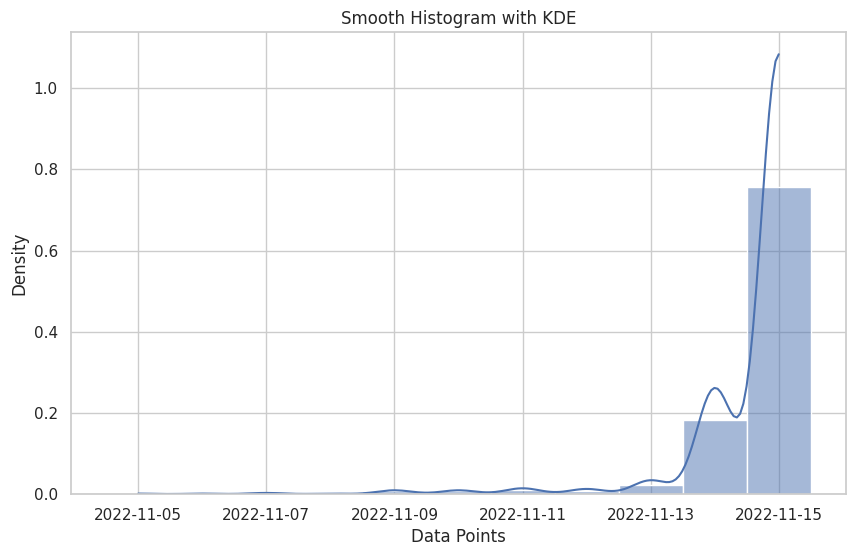

In [20]:
# Create the histogram with a KDE
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(tweet_times2, kde=True, bins=150, stat="density")
plt.title('Smooth Histogram with KDE')
plt.xlabel('Data Points')
plt.ylabel('Density')
plt.show()

### Test Network

In [21]:
# Generate Network
%%time

with open(networks_folder/'test_network_dict.pkl', 'rb') as f:
   network_dict = pickle.load(f)

G = nx.DiGraph()
for key in tqdm.tqdm(network_dict):
    G.add_node(key)
    for referenced in network_dict[key]:
        G.add_node(referenced)
        weight=network_dict[key][referenced]
        G.add_edge(referenced,key,weight=weight)

100%|██████████| 153/153 [00:00<00:00, 98379.35it/s]

CPU times: user 5.16 ms, sys: 964 µs, total: 6.13 ms
Wall time: 9.96 ms


In [22]:
print(len(G.nodes))
print(len(G.edges))

446
334


In [23]:
%%time
nx.write_gml(G,networks_folder/'Test_Network.gml')
F = nx.read_gml(networks_folder/'Test_Network.gml')
print(G.nodes==F.nodes)
print(G.edges==F.edges)

True
True
CPU times: user 41.5 ms, sys: 3.8 ms, total: 45.3 ms
Wall time: 1.23 s


In [24]:
%%time
nx.write_graphml(G, networks_folder/"Test_Network.graphml")
F = nx.read_graphml(networks_folder/'Test_Network.graphml')
print(G.nodes==F.nodes)
print(G.edges==F.edges)

True
True
CPU times: user 30.5 ms, sys: 5.96 ms, total: 36.5 ms
Wall time: 372 ms


In [25]:
%%time
nx.write_gexf(G, networks_folder/"Test_Network.gexf")
F = nx.read_gexf(networks_folder/'Test_Network.gexf')
print(G.nodes==F.nodes)
print(G.edges==F.edges)

False
True
CPU times: user 19 ms, sys: 1.02 ms, total: 20 ms
Wall time: 533 ms


In [26]:
# https://networkx.org/documentation/networkx-1.10/reference/readwrite.json_graph.html
# https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.readwrite.json_graph.node_link_data.html#networkx.readwrite.json_graph.node_link_data
#https://stackoverflow.com/questions/34665042/read-json-graph-networkx-file
%%time
from networkx.readwrite import json_graph

g_json = json_graph.node_link_data(G)
json.dump(g_json,open(networks_folder/'Test_Network.json','w'))#,indent=2)

with open(networks_folder/'Test_Network.json','r') as f:
    js_graph = json.load(f)

J=json_graph.node_link_graph(js_graph)
print(G.nodes==J.nodes)
print(G.edges==J.edges)

/usr/local/lib/python3.12/dist-packages/networkx/readwrite/json_graph/node_link.py:145: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


True
True
CPU times: user 9.35 ms, sys: 1.97 ms, total: 11.3 ms
Wall time: 361 ms


/usr/local/lib/python3.12/dist-packages/networkx/readwrite/json_graph/node_link.py:290: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


### Test Author Corpus Dictionary

In [30]:

with open(cleanedds_folder/'test_author_corpus_dict.pkl', 'rb') as f:
   author_corpus_dict = pickle.load(f)

i=0
for key in author_corpus_dict:
  i+=1
  print(author_corpus_dict[key])
  print('-----')
  if i>10:
    break

['RT @WonderBotz: GENIE automatically captures all user activity and utilizes one-of-a-kind AI to create process flows and actionable insight…']
-----
['GENIE automatically captures all user activity and utilizes one-of-a-kind AI to create process flows and actionable insights.\n\nGENIE requires minimal user interference to derive its full value. https://t.co/jhWKAn8eCd']
-----
['We really looked at this man and collectively agreed that he is a soft-dom across every universe from pirate to professor to sentient AI https://t.co/6X7tDAQJV0']
-----
['UK - Why has the UK Government allowed the WEF to write the principles for Ai procurement for the government? \n\nWhen did the WEF become a government department? https://t.co/B10XSK3ytg']
-----
['Chrissmus a come mi waa mi llama https://t.co/ru2kUNbyGd']
-----
['#XANA #metaverse the New Story “XANADO”\nThe episode #1 “XANA Metaverse”\nHas been Updated!\n\nThe story revolves around a group of talented individuals who started creating a blockc

## Full Data

### Generate Full Timeline and Network Dictionaries

In [33]:
type_of_network = 'retweeted'

In [34]:
# Check how it looks, LINE BY LINE
generate_data = True
if generate_data:
  # Open the full dataset file
  with open(cleanedds_folder/'AItrust_pruned_twits.json','r',encoding='utf-8') as AItrust_pruned_twits:
    timeline_dict = dict()
    basic_counts_dict = {'original':0,'retweeted':0,'replied_to':0,'quoted':0,'total_count':0,'exceptions':0}
    network_dict = dict()
    author_corpus_dict = dict()
    tweet_times = []
    twids =set()
    i = 0

    for line in tqdm.tqdm(AItrust_pruned_twits, total=17410035): # Added total based on previous output
      try:
          twit = json.loads(line)
          i+=1

          # Ids
          twid=twit['id']
          twids.add(twid)

          # Basic Counts
          type_of_tweet = twit['type']
          basic_counts_dict[type_of_tweet]+=1
          basic_counts_dict['total_count']+=1

          # Timeline
          tw_date = twit['created_at']
          # Removing the 'Z' as fromisoformat doesn't handle the 'Z' which stands for UTC
          date_string = tw_date.replace('Z', '+00:00')
          # Converting the string to a datetime object
          datetime_obj = datetime.fromisoformat(date_string)
          # Convert datetime object to just a date (removes time part)
          date_only = datetime_obj.date()
          #original_tweet_date = datetime.strptime(tweet['TW_Date'],'%a %b %d %X %z %Y').replace(minute=0, second=0, microsecond=0)
          timeline_dict[twid]=tw_date#original_tweet_date
          tweet_times.append(date_only)

          # Network
          if twit['type'] == type_of_network:
            author = str(twit['author_id'])
            #print(author)
            referenced_author=str(twit['referenced_tweets_dictionary']['author_id'])
            #print(referenced)
            if referenced_author in network_dict:
              if author in network_dict[referenced_author]:
                  network_dict[referenced_author][author]+=1
              else:
                  network_dict[referenced_author][author]=1
            else:
                network_dict[referenced_author]=dict()
                network_dict[referenced_author][author]=1

          # Author Corpus Dict
          author = str(twit['author_id'])
          if author in author_corpus_dict:
            author_corpus_dict[author].append(twit['text'])
          else:
            author_corpus_dict[author]=[]
            author_corpus_dict[author].append(twit['text'])

      except Exception as e:
          #print(traceback.format_exc())
          print(e)
          basic_counts_dict['exceptions']+=1
          continue #goes to the next iteration

    with open(networks_folder / 'full_network_dict.pkl', 'wb') as f:
        pickle.dump(network_dict, f)

    with open(cleanedds_folder / 'full_basic_counts_dict.pkl', 'wb') as f:
        pickle.dump(basic_counts_dict, f)

    with open(cleanedds_folder / 'full_timeline_dict.pkl', 'wb') as f:
        pickle.dump(timeline_dict, f)

    with open(cleanedds_folder / 'full_author_corpus_dict.pkl', 'wb') as f:
      pickle.dump(author_corpus_dict, f)

    #AItrust_pruned_twits.close() # File is automatically closed by the 'with' statement
    print('\n')
    print(len(timeline_dict))
    print('\n')
    print(i)
    print(len(tweet_times))
    print(len(twids))
    print(basic_counts_dict)

100%|██████████| 17410035/17410035 [09:17<00:00, 31221.31it/s]




17410035


17410035
17410035
17410035
{'original': 4061626, 'retweeted': 9638407, 'replied_to': 3221048, 'quoted': 488954, 'total_count': 17410035, 'exceptions': 0}


### Full Timeline

In [35]:
with open(cleanedds_folder/'full_timeline_dict.pkl', 'rb') as f:
    timeline_dict = pickle.load(f)

print(len(timeline_dict))
# Select a random key from the dictionary
random_key = random.choice(list(timeline_dict.keys()))
timeline_dict[random_key]

17410035


'2023-02-20T19:18:36.000Z'

In [36]:
rdtw = random.sample(list(timeline_dict.items()), 1)
print(rdtw)
example_date = rdtw[0][1]
print(example_date)

# Removing the 'Z' as fromisoformat doesn't handle the 'Z' which stands for UTC
date_string = example_date.replace('Z', '+00:00')

# Converting the string to a datetime object
datetime_obj = datetime.fromisoformat(date_string)
print(datetime_obj)

# Convert datetime object to just a date (removes time part)
date_only = datetime_obj.date()
print(date_only)
# Remove minutes and seconds by setting them to zero
modified_datetime = datetime_obj.replace(hour=0,minute=0, second=0)
print(modified_datetime)

[('1594727362427781120', '2022-11-21T16:20:06.000Z')]
2022-11-21T16:20:06.000Z
2022-11-21 16:20:06+00:00
2022-11-21
2022-11-21 00:00:00+00:00


In [37]:
%%time
# We only consider tweets after September 2022
# Offset-aware datetime
earliest_date = datetime(2022, 11, 1, tzinfo=timezone.utc)
earliest_date = earliest_date.date()

tweet_times = []
print(len(timeline_dict.keys()))
print('Normalizing to the hour')
for key in tqdm.tqdm(timeline_dict):
    tw_date = timeline_dict[key]
    # Removing the 'Z' as fromisoformat doesn't handle the 'Z' which stands for UTC
    date_string = tw_date.replace('Z', '+00:00')
    # Converting the string to a datetime object
    datetime_obj = datetime.fromisoformat(date_string)
    # Convert datetime object to just a date (removes time part)
    date_only = datetime_obj.date()
    tweet_times.append(date_only)

17410035
Normalizing to the hour


100%|██████████| 17410035/17410035 [00:25<00:00, 692826.32it/s]

CPU times: user 25.4 s, sys: 524 ms, total: 25.9 s
Wall time: 25.9 s


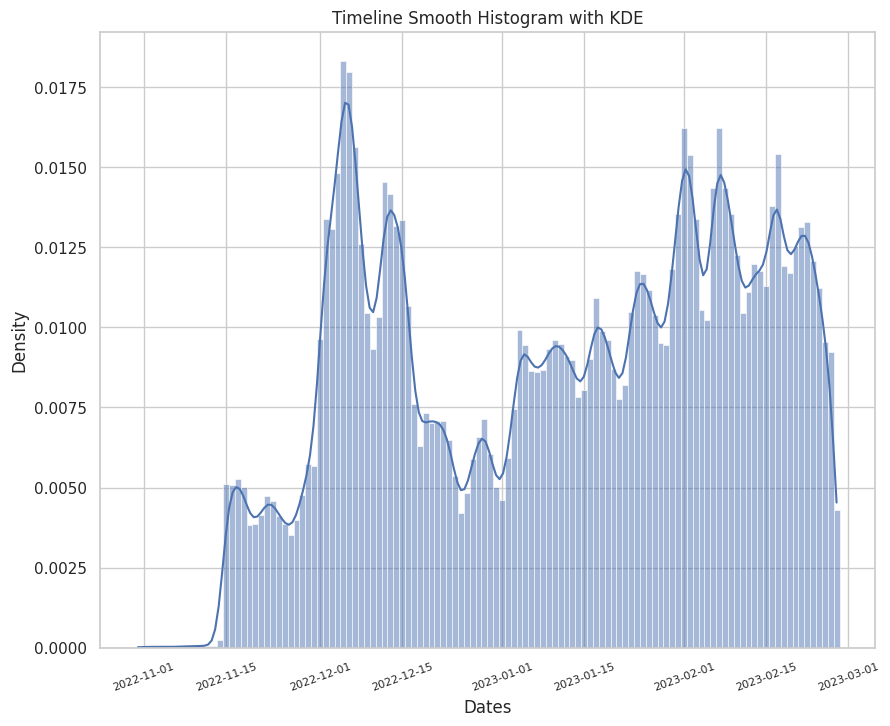

CPU times: user 2min 48s, sys: 4.04 s, total: 2min 52s
Wall time: 2min 47s


In [38]:
%%time
# Create the histogram with a KDE
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.histplot(tweet_times, kde=True, bins=150, stat="density")
plt.title('Timeline Smooth Histogram with KDE')
plt.xlabel('Dates')
plt.ylabel('Density')
plt.xticks(fontsize=8,rotation=20)
plt.show()

### Full Network

In [39]:
# Generate Network
%%time
with open(networks_folder/'full_network_dict.pkl','rb') as f:
   network_dict = pickle.load(f)

G = nx.DiGraph()
for key in tqdm.tqdm(network_dict):
    G.add_node(key)
    for referenced in network_dict[key]:
        G.add_node(referenced)
        weight=network_dict[key][referenced]
        G.add_edge(referenced,key,weight=weight)

100%|██████████| 374368/374368 [01:18<00:00, 4774.65it/s] 

CPU times: user 1min 20s, sys: 2.4 s, total: 1min 22s
Wall time: 1min 22s


In [40]:
print(len(G.nodes))
print(len(G.edges))

3379040
7768720


In [41]:
%%time
nx.write_gml(G,networks_folder/'Full_Network.gml')
F = nx.read_gml(networks_folder/'Full_Network.gml')
print(G.nodes==F.nodes)
print(G.edges==F.edges)

True
True
CPU times: user 10min 30s, sys: 23.2 s, total: 10min 53s
Wall time: 11min 19s


In [42]:
%%time
nx.write_graphml(G, networks_folder/"Full_Network.graphml")
F = nx.read_graphml(networks_folder/'Full_Network.graphml')
print(G.nodes==F.nodes)
print(G.edges==F.edges)

True
True
CPU times: user 7min 2s, sys: 24.3 s, total: 7min 26s
Wall time: 7min 40s


In [43]:
# https://networkx.org/documentation/networkx-1.10/reference/readwrite.json_graph.html
# https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.readwrite.json_graph.node_link_data.html#networkx.readwrite.json_graph.node_link_data
#https://stackoverflow.com/questions/34665042/read-json-graph-networkx-file
%%time
from networkx.readwrite import json_graph

g_json = json_graph.node_link_data(G)
json.dump(g_json,open(networks_folder/'Full_Network.json','w'))#,indent=2)

with open(networks_folder/'Full_Network.json','r') as f:
    js_graph = json.load(f)

J=json_graph.node_link_graph(js_graph)
print(G.nodes==J.nodes)
print(G.edges==J.edges)

/usr/local/lib/python3.12/dist-packages/networkx/readwrite/json_graph/node_link.py:145: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/networkx/readwrite/json_graph/node_link.py:290: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


True
True
CPU times: user 2min 6s, sys: 4.41 s, total: 2min 10s
Wall time: 2min 22s


### Full Author Corpus Dict

In [44]:

with open(cleanedds_folder/'full_author_corpus_dict.pkl', 'rb') as f:
   author_corpus_dict = pickle.load(f)

i=0
for key in author_corpus_dict:
  i+=1
  print(author_corpus_dict[key])
  print('-----')
  if i>10:
    break

['Hey \nyou need perfect scores and completely AI proof content in your assignments and essays🤩🤩?\nWe are your best made decision this semester we handle:\n✏MATLAB\n✏Mathematics\n✏Coding\n✏Accounting/Finance\n✏Web\n✏Python\n✏Tableau, Excel, SPSS Statistics']
-----
['RT @lallamapic: La Llama is checked ✅🤣\n\nWho wants a draw for a Checks VV edition ($3200)⁉️\n\nRequirements:\n1. RT, Like &amp; Follow @lallamapic…', 'RT @therealgonku: Ok that’s enough AI for one day guys https://t.co/sdu9OwW6lo', "RT @kutsuberanner: 🍀X2E-HEROES #007's name is Garm.🍀\nThis is a fan art created by AI. \nGarum is our beloved hero character.🐺\n\nAs a token of…", 'RT @TwistedTheMind: To celebrate the launch of our groundbreaking AI project "A Lack of Intelligence", I am giving away this Muerto!\n\n👉 Lik…', 'RT @PeggioPak: @DaFameless @Pellouxxx @Llamaverse_ Hi my friend! Welcome in tha llama fam ❤️', 'RT @echelondoteth: @DaFameless @September092021 @Llamaverse_ Great looking llama 🦙😍', 'RT @SahibNoor08: I wan

# Disconnect from Runtime

In [45]:
from datetime import datetime
import pytz
from IPython.display import Javascript

# Get current time in New York
nyc_time = datetime.now(pytz.timezone('America/New_York'))
formatted_time = nyc_time.strftime('%Y-%m-%d %H:%M:%S %Z')

# Print and log
print(f"✅ Disconnected from runtime at: {formatted_time}")

# Disconnect Colab runtime
display(Javascript('google.colab.kernel.disconnect()'))

✅ Disconnected from runtime at: 2025-10-31 09:04:40 EDT


<IPython.core.display.Javascript object>